In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 20         # Number of data points
D = 2          # Dimension of a data point
K = 3          # Number of centroids

X = np.random.random((N, D))
X

array([[7.19322266e-01, 5.15536267e-01],
       [5.11376586e-01, 8.21268360e-01],
       [4.49288692e-01, 9.68065031e-04],
       [7.93330997e-01, 4.46890650e-02],
       [8.01277752e-01, 8.55275975e-02],
       [8.81224204e-01, 3.09884242e-01],
       [1.46897781e-01, 5.08050584e-01],
       [9.77703959e-02, 5.54561934e-01],
       [6.34831096e-01, 1.91521986e-01],
       [9.29480398e-01, 1.55653096e-03],
       [7.24148584e-01, 4.92281093e-01],
       [9.57517278e-01, 2.18917986e-01],
       [4.28254103e-01, 9.90948764e-01],
       [5.92946040e-01, 1.80129382e-01],
       [4.23175290e-01, 4.24514159e-01],
       [7.71527615e-02, 9.46093770e-04],
       [4.91701994e-01, 1.39175434e-01],
       [6.10705614e-01, 5.01543256e-01],
       [3.25501387e-01, 4.52365128e-01],
       [6.09119934e-01, 3.65564695e-01]])

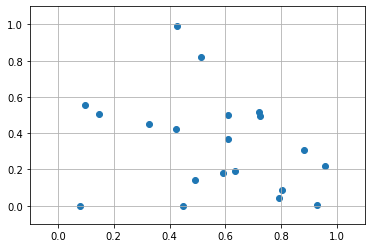

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid()

# Initial centroids

In [4]:
random_indices = np.random.choice(N, K, replace=False)
centroids = X[random_indices]
centroids

array([[0.80127775, 0.0855276 ],
       [0.4282541 , 0.99094876],
       [0.51137659, 0.82126836]])

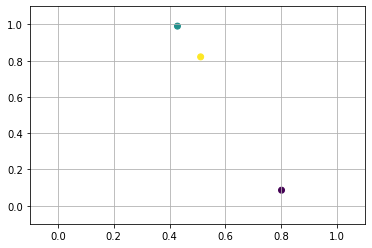

In [5]:
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1,2])
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid()

# Distance from each point to centroids

In [6]:
print(f"centroid  shape {centroids.shape}")
print(f"X_reshaed shape {X[:, np.newaxis, :].shape}")

centroid  shape (3, 2)
X_reshaed shape (20, 1, 2)


In [7]:
np.power(X[:, np.newaxis, :] - centroids, 2).sum(axis=-1)

array([[0.19162416, 0.31073772, 0.13671352],
       [0.62535716, 0.03570079, 0.        ],
       [0.13104661, 0.98050424, 0.67674748],
       [0.00173094, 1.02868856, 0.68257369],
       [0.        , 0.95893413, 0.62535716],
       [0.05672734, 0.6690308 , 0.39830098],
       [0.60673882, 0.31235203, 0.23095017],
       [0.71491581, 0.29965295, 0.2422024 ],
       [0.0389393 , 0.68175723, 0.41182151],
       [0.02348706, 1.23012479, 0.84673828],
       [0.17139731, 0.33622299, 0.15350454],
       [0.04220379, 0.87615103, 0.56186749],
       [0.95893413, 0.        , 0.03570079],
       [0.0523516 , 0.68455151, 0.41771277],
       [0.25787336, 0.32087396, 0.16519336],
       [0.53151103, 1.10337744, 0.86147895],
       [0.09871524, 0.72954344, 0.46563785],
       [0.20938677, 0.27280631, 0.1120904 ],
       [0.36093292, 0.30063045, 0.17063918],
       [0.1153454 , 0.42381768, 0.21721959]])

# K-mean clustering

In [8]:
def update_centroids(X, centroids, num_centroids=K):
    _centroids = np.copy(centroids)

    # --------------------------------------------------------------------------------
    # Calculate distance from each data point x to centroids.
    # [Example]
    # [0.        , 0.01592959, 0.14055503],    # distance from the data point x0 to centroids
    # [0.21904793, 0.23859055, 0.27079493],    
    # [0.0158939 , 0.06245311, 0.23647889],
    # ...
    # 
    # [Steps]
    # X has shape (N, D) and centroids has shape (K, D).
    # 1. Get (N, K, D) where each row (K, D) is [(x-c0)^2, (x-c0)^2, (x-c0)^2]
    # 2. Get (N, K) where each row is (distance_from_c0, distance_from_c1, distance_form_c2)
    #    for each data point x. 
    # --------------------------------------------------------------------------------
    X_reshaped = X[:, np.newaxis, :]                   # Shape (N, 1, D)
    deltas_from_centroids = X_reshaped - _centroids    # Shape (N, K, D) via (N, 1, D) - (K, D) 
    distances_from_centroids = np.power(deltas_from_centroids, 2).sum(axis=-1)

    # --------------------------------------------------------------------------------
    # Identify nearest centroid to each data point
    # --------------------------------------------------------------------------------
    nearest_centroid_ids = np.argmin(distances_from_centroids, axis=-1)
    
    # --------------------------------------------------------------------------------
    # Get new coordinate for each centroid i
    # --------------------------------------------------------------------------------
    for i in range(num_centroids):
        # 1. Extract the cluster for centroid i.
        cluster_for_centroid_i = X[nearest_centroid_ids == i]

        # 2. Get the mean as the new coordinate of the centroid i
        _centroids[i] = X[nearest_centroid_ids == i].mean(axis=0)
        
    return _centroids, nearest_centroid_ids

In [9]:
for i in range(100):
    centroids, nearests = update_centroids(X, centroids)

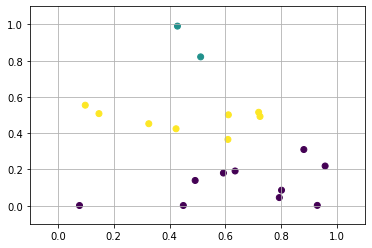

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=nearests)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid()

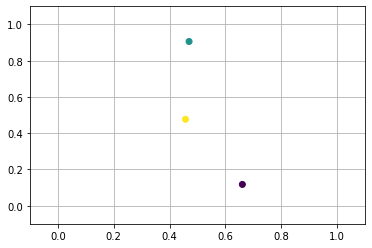

In [11]:
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1,2])
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid()